In [1]:
 def entroper(p):   
    import math
    entropy = 0
    for i in p:
        if i == 0:
            entropy += 0
        else:
            entropy += i*math.log(i,2)
    return abs(entropy)

In [2]:
def modify(listt):
    string = listt[0]
    stringlist = string.split("[ ")
    stringlist.pop(0)
    modified = stringlist[0]
    listt.pop(0)
    listt.insert(0,modified)

In [3]:
# Reading the files
def motiffetch(location):
    import pandas as pd

    pssm = open(location,"r")
    lines = pssm.readlines()
    motifdict = {}
    motif = 0
    motiflist = []
    for line in lines:
        if line[0] == "A":
            motiflist = []
            motif += 1
            linelist = line.split("\t")
            linelist.remove("A")
            linelist.remove("]\n")
            modify(linelist)
            motiflist.append(linelist)
        if line[0] == "G" or line[0] == "C":
            linelist = line.split("\t")
            if "G" in linelist:
                linelist.remove("G")
            if "C" in linelist:
                linelist.remove("C")
            linelist.remove("]\n")
            modify(linelist)
            motiflist.append(linelist)
        if line[0] == "T":
            linelist = line.split("\t")
            motiflist.append(linelist)
            linelist.remove("T")
            linelist.remove("]\n")
            modify(linelist)
            motifdict[motif] = motiflist
    return motifdict

In [4]:
def arraymaker(loc):
    import pandas as pd
    dic = motiffetch(loc)
    for i in dic.keys():
        df = pd.DataFrame(dic[i])
        ls = []
        for j in df.columns:
            total = (df[j].astype(float)).sum()
            df[j] = (df[j].astype(float))/total
            ls.append(df[j].tolist())
        dic[i] = ls
    return dic

In [5]:
def edic(loc):
    c = arraymaker(loc)
    import pandas as pd
    dic = motiffetch(loc)
    entropydic = {}
    for i in dic.keys():
        df = pd.DataFrame(dic[i])
        for j in df.columns:
            total = (df[j].astype(float)).sum()
            df[j] = (df[j].astype(float))/total
        entropylist = []
        for k in df.columns:
            column = df[k].tolist()
            entropylist.append(entroper(column))
        entropydic[i] = entropylist
    return [c,entropydic]

In [6]:
def revdic(locs):
    diclist = edic(locs)
    dic = diclist[0]
    oldedic = diclist[1]
    newdic = {}
    for i in dic.keys():
        pos = dic[i]
        revpos = pos[::-1]
        newpos = []
        for j in range(len(revpos)):
            oldprob = revpos[j]
            newprob = oldprob[::-1]
            newpos.append(newprob)
        newdic[i] = newpos
    newedic = {}
    for k in oldedic.keys():
        olde = oldedic[k]
        newe = olde[::-1]
        newedic[k] = newe
    return [newdic,newedic]
        

In [7]:
def generator(dic,index):
    import random
    values = dic[index]
    width = len(values[0])
    characters = ["A","C","G","T"]
    letters = []
    for i in range(width):
        weights = []
        for j in range(4):
            weight = float(values[j][i])
            weights.append(weight)
        element = random.choices(characters,weights,k=1)
        letter = "".join(element)
        letters.append(letter)
    word = "".join(letters)

In [8]:
def ugdic():
    import pandas as pd
    ugmotifs = open("../Files/Data/ugmotifs.txt","r")
    lines = ugmotifs.readlines()
    motifs = {}
    for i in range(len(lines)):
        s = lines[i].strip("\n")
        k = s.split("\t")
        motifs[i] = k
    return motifs


In [28]:
def motifslist():
    motifs = ugdic()
    keys = motifs.keys()
    motifslist = []
    for i in keys:
        loc = "../Files/Data/pssm"
        data = motifs[i]
        if int(data[1]) != 0:
            if data[2] == "r":
                dic = revdic(loc + str(data[0]) + ".txt")
                motif = dic[0][int(data[1])]
                entropy = dic[1][int(data[1])]
                motifslist.append([motif,entropy])
            if data[2] == "f":
                dic = edic(loc + str(data[0]) + ".txt")
                motif = dic[0][int(data[1])]
                entropy = dic[1][int(data[1])]
                motifslist.append([motif,entropy])
    return motifslist 


In [29]:
def aligner():
    motifs = motifslist()
    aligned = []
    for i in range(len(motifs)):
        motif = motifs[i]
        pssm = motif[0]
        entropy = motif[1]
        for j in range(len(pssm)):
            if pssm[j][2] > 0.8:
                newpssm = pssm[j:j+6]
                newentropy = entropy[j:j+6]
                aligned.append([newpssm,newentropy])
                break
    return aligned           

9


In [46]:
def averager():
    gatas = aligner()
    unigata = []
    for k in range(6):
        unipssm = []
        asum = 0
        csum = 0
        gsum = 0
        tsum  = 0
        for i  in gatas:
            pssm = i[0]
            position = pssm[k]
            asum += position[0]
            csum += position[1]
            gsum += position[2]
            tsum += position[3]
        unipssm.append(asum/9)
        unipssm.append(csum/9)
        unipssm.append(gsum/9)
        unipssm.append(tsum/9)
        unigata.append(unipssm)
        

    return unigata

averager()

[[0.017273795272501783,
  0.00012103606874848706,
  0.9825165633069867,
  8.86053517632465e-05],
 [0.9909107991419062,
  8.86053517632465e-05,
  0.008901033578811621,
  9.956192751891676e-05],
 [0.008038854649117258,
  0.006845928539724903,
  0.0047464372879268595,
  0.9803687795232309],
 [0.8608594503273724,
  0.00020924879681941827,
  0.06516238953767846,
  0.07376891133812977],
 [0.8452741909650323,
  0.010339294807872813,
  0.12263662850572832,
  0.021749885721366644],
 [0.20279565304803343,
  0.23106738129202734,
  0.5216732939302622,
  0.04446367172967706]]

IndexError: index 4 is out of bounds for axis 1 with size 4

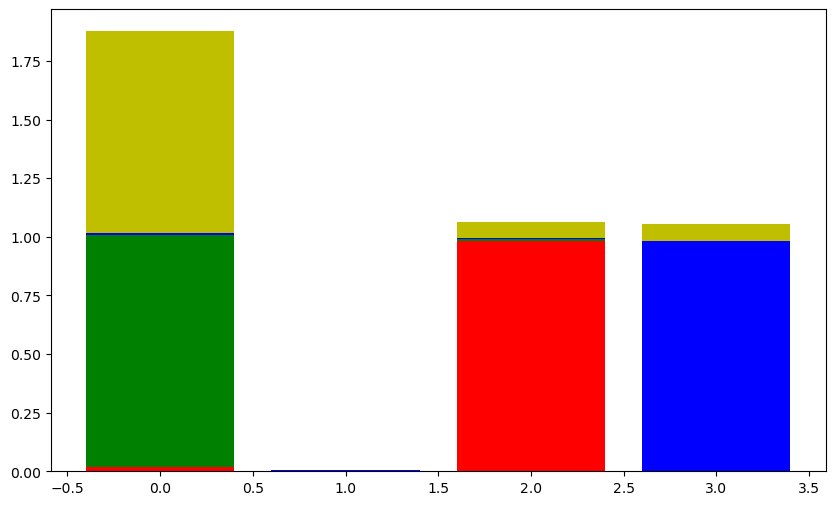

In [56]:
import matplotlib.pyplot as plt
import numpy as np

frequency_matrix = np.array(averager())
sequence_length = 6
fig, ax = plt.subplots(figsize=(10, 6))
bases = 'rgby'
for i in range(sequence_length):
    y_offset = 0
    for j, base in enumerate(bases):
        ax.bar(i, frequency_matrix[j, i], bottom=y_offset, color=base)
        y_offset += frequency_matrix[j, i]

ax.set_xticks(np.arange(sequence_length))
ax.set_xticklabels(range(1, sequence_length + 1))
ax.set_ylabel('Probability')
ax.set_xlabel('Position')

plt.legend(bases)
plt.title('DNA Sequence Logo')
plt.show()